In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv')
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
lm = LinearRegression()
lm

LinearRegression()

In [7]:
X = df[["highway-mpg"]]
Y = df["price"]
lm.fit(X, Y)

LinearRegression()

In [8]:
Yhat = lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [16]:
print(lm.intercept_,"\n", lm.coef_)

38423.3058581574 
 [-821.73337832]


In [17]:
lm1 = LinearRegression()
lm1

LinearRegression()

In [20]:
X = df[["engine-size"]]
Y = df["price"]
lm1.fit(X,Y)
lm1

LinearRegression()

In [25]:
b = lm1.coef_

In [26]:
a = lm1.intercept_

In [27]:

print("price = ", a, " + ", b, "x engine-size")

price =  -7963.338906281042  +  [166.86001569] x engine-size


In [28]:
price = a + b*X
price

,engine-size
0,13728.463134
1,13728.463134
2,17399.383479
3,10224.402804
4,14729.623228
...,...
196,15563.923306
197,15563.923306
198,20903.443808
199,16231.363369


In [29]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
Y = df['price']
lm.fit(Z, Y)

LinearRegression()

In [30]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [31]:
lm.intercept_

-15806.624626329209

In [32]:
lm2 = LinearRegression()
lm2.fit(df[['normalized-losses' , 'highway-mpg']],df['price'])

LinearRegression()

In [33]:
import seaborn as sns
%matplotlib inline

(0.0, 48170.79427556911)

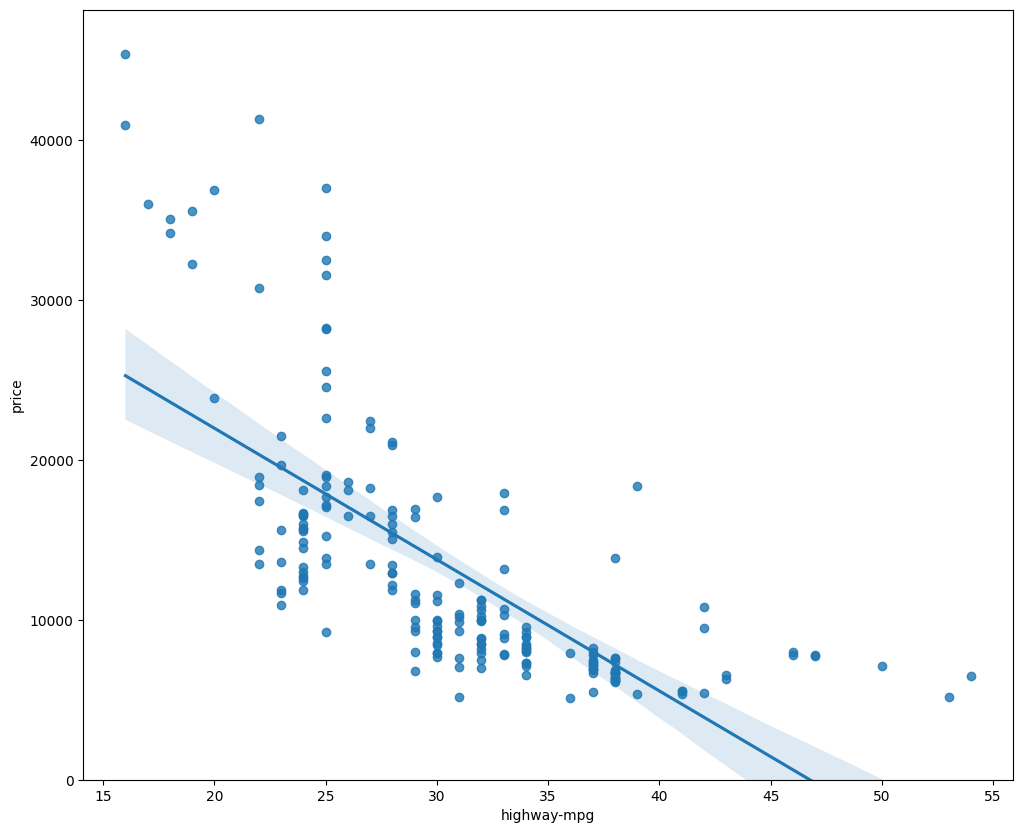

In [36]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0.0, 47414.1)

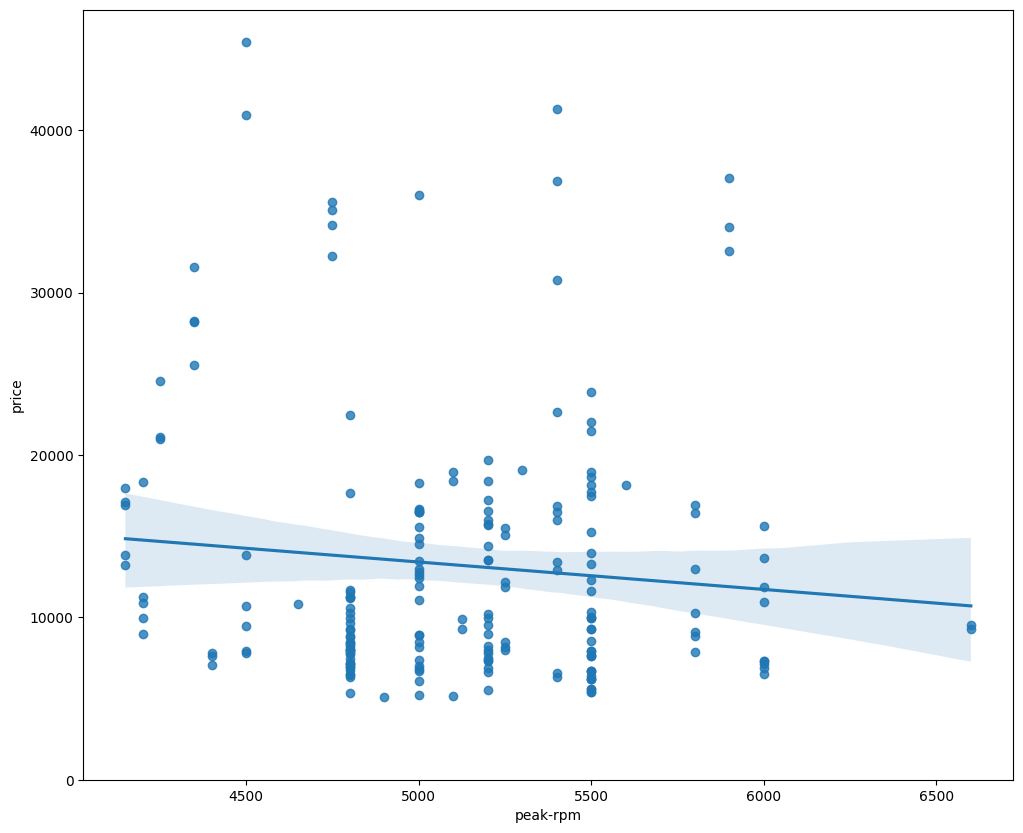

In [38]:
plt.figure(figsize =(width, height))
sns.regplot(x="peak-rpm",y="price", data = df)
plt.ylim(0,)

In [40]:
df[["peak-rpm", "highway-mpg", "price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


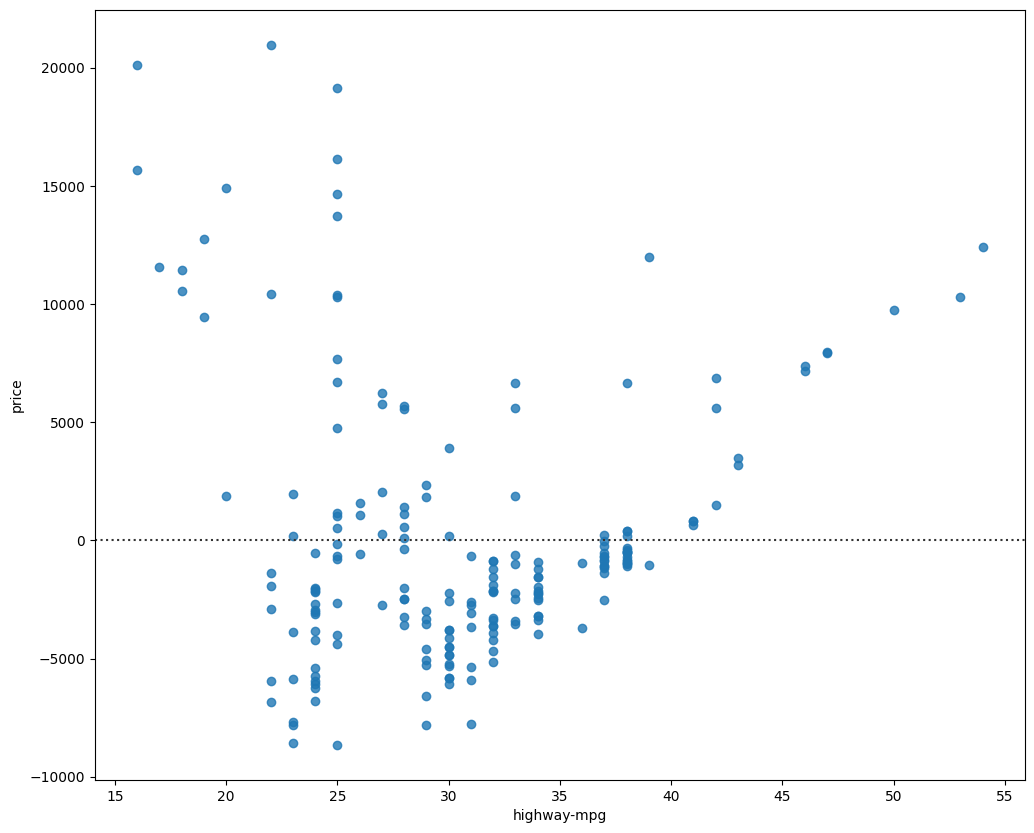

In [41]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'],y=df['price'])
plt.show()

In [42]:
Yhat = lm.predict(Z)

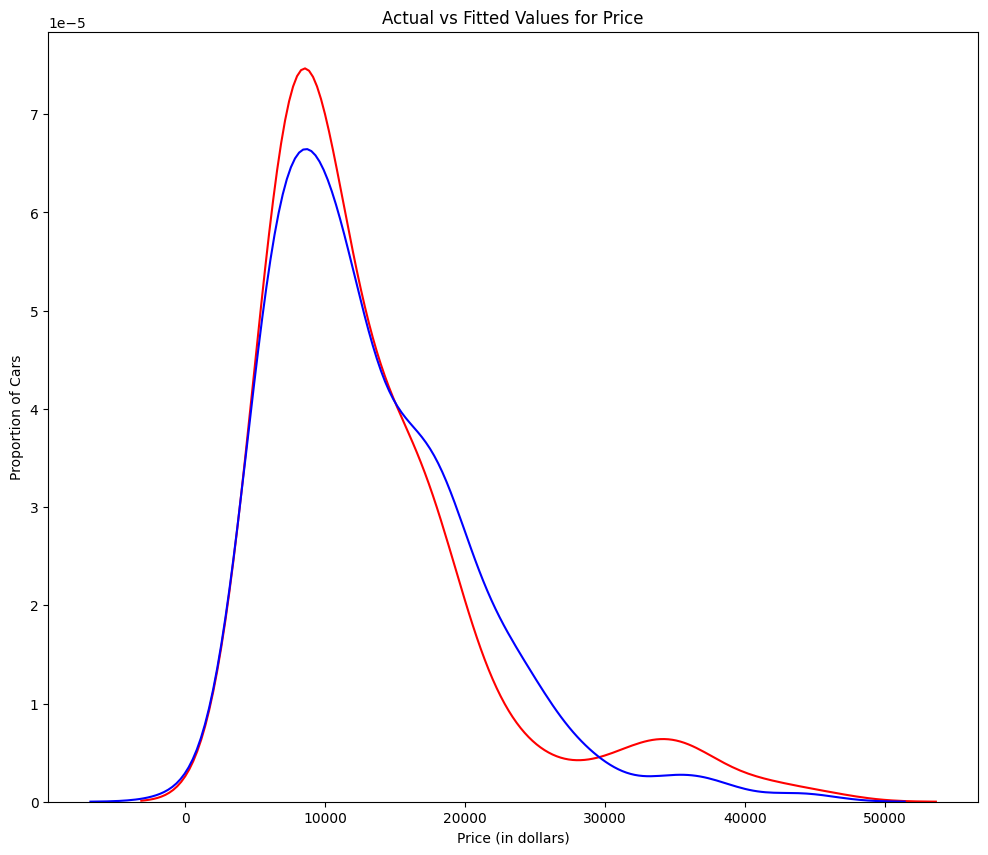

In [44]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()